# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mochammad Wahyu Ramadhan
- **Email:** wahyuramadhan9090@gmail.com
- **ID Dicoding:** wahyuramadhan

## Menentukan Pertanyaan 

- Bagaimana dinamika konsentrasi PM2.5 selama periode 2013–2017 di seluruh stasiun pemantauan?

- Stasiun mana yang cenderung memiliki rata-rata PM2.5 tertinggi dan terendah selama 2013–2017?

- Apakah terdapat perbedaan pola PM2.5 antara hari kerja dan akhir pekan (serta pola hariannya Senin–Minggu)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [3]:
import os

path = "data"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
csv_files


['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv']

In [2]:
import os
import shutil

os.makedirs("data", exist_ok=True)

for f in os.listdir("/content"):
    if f.endswith(".csv"):
        shutil.move(f"/content/{f}", f"/content/data/{f}")

In [4]:
path = "data"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

In [5]:
df_list = []

for file in csv_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    print(df.head())
    df_list.append(df)

air_quality_df = pd.concat(df_list, ignore_index=True)

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013 

In [6]:
# hitung banyak file
num_files = len(csv_files)
print(f"Jumlah file CSV dalam dataset: {num_files}")
print("Nama-nama file CSV dalam dataset:")
for file in csv_files:
    print(file)

Jumlah file CSV dalam dataset: 12
Nama-nama file CSV dalam dataset:
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv


**Insight:**
- Data yang dianalisis merupakan data kualitas udara yang berasal dari beberapa file CSV.
- Setiap file merepresentasikan satu stasiun pemantauan kualitas udara, sehingga data yang digunakan mencerminkan kondisi kualitas udara dari berbagai lokasi pengukuran.

### Assessing Data

In [7]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [9]:
cek_missing = pd.DataFrame({
    'Kolom': air_quality_df.columns,
    'Banyak Missing Value': air_quality_df.isnull().sum(),
    'Persentase Missing Value': air_quality_df.isnull().mean() * 100
})
cek_missing

,Kolom,Banyak Missing Value,Persentase Missing Value
No,No,0,0.000000
year,year,0,0.000000
month,month,0,0.000000
day,day,0,0.000000
hour,hour,0,0.000000
PM2.5,PM2.5,8739,2.076916
PM10,PM10,6449,1.532674
SO2,SO2,9021,2.143937
NO2,NO2,12116,2.879497
CO,CO,20701,4.919813


In [10]:
print("Jumlah duplikasi: ", air_quality_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
air_quality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [12]:
categorical_columns = ['station', 'year', 'month', 'day', 'hour', 'wd']
for col in categorical_columns:
    unique_values = air_quality_df[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_values)} nilai unik: {unique_values}\n")

Kolom 'station' memiliki 12 nilai unik: ['Aotizhongxin' 'Guanyuan' 'Wanliu' 'Dingling' 'Changping' 'Dongsi'
 'Wanshouxigong' 'Tiantan' 'Nongzhanguan' 'Gucheng' 'Huairou' 'Shunyi']

Kolom 'year' memiliki 5 nilai unik: [2013 2014 2015 2016 2017]

Kolom 'month' memiliki 12 nilai unik: [ 3  4  5  6  7  8  9 10 11 12  1  2]

Kolom 'day' memiliki 31 nilai unik: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

Kolom 'hour' memiliki 24 nilai unik: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Kolom 'wd' memiliki 17 nilai unik: ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]



**Insight:**
- Berdasarkan hasil pengecekan awal, dataset memiliki kombinasi tipe data numerik dan non-numerik yang sesuai dengan kebutuhan analisis.
- Beberapa variabel, khususnya pada polutan udara dan faktor meteorologi, masih mengandung nilai kosong, dengan jumlah terbesar terdapat pada variabel CO.

### Cleaning Data

In [13]:
numeric_columns = air_quality_df.select_dtypes(include=[np.number]).columns

agg_numeric = air_quality_df.groupby('station')[numeric_columns].mean().reset_index()
print("Rata-rata kolom numerik per stasiun:")
print(agg_numeric)

Rata-rata kolom numerik per stasiun:
          station       No        year    month        day  hour      PM2.5  \
0    Aotizhongxin  17532.5  2014.66256  6.52293  15.729637  11.5  82.773611   
1       Changping  17532.5  2014.66256  6.52293  15.729637  11.5  71.099743   
2        Dingling  17532.5  2014.66256  6.52293  15.729637  11.5  65.989497   
3          Dongsi  17532.5  2014.66256  6.52293  15.729637  11.5  86.194297   
4        Guanyuan  17532.5  2014.66256  6.52293  15.729637  11.5  82.933372   
5         Gucheng  17532.5  2014.66256  6.52293  15.729637  11.5  83.852089   
6         Huairou  17532.5  2014.66256  6.52293  15.729637  11.5  69.626367   
7    Nongzhanguan  17532.5  2014.66256  6.52293  15.729637  11.5  84.838483   
8          Shunyi  17532.5  2014.66256  6.52293  15.729637  11.5  79.491602   
9         Tiantan  17532.5  2014.66256  6.52293  15.729637  11.5  82.164911   
10         Wanliu  17532.5  2014.66256  6.52293  15.729637  11.5  83.374716   
11  Wanshouxigo

In [14]:
categorical_columns = air_quality_df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'station']

agg_categorical = air_quality_df.groupby('station')[categorical_columns].agg(lambda x: x.mode().iloc[0]).reset_index()
print("Modus kolom kategorik per stasiun:")
print(agg_categorical)

Modus kolom kategorik per stasiun:
          station   wd
0    Aotizhongxin   NE
1       Changping  NNW
2        Dingling  NNW
3          Dongsi  ENE
4        Guanyuan   NE
5         Gucheng    N
6         Huairou   NW
7    Nongzhanguan  ENE
8          Shunyi  NNE
9         Tiantan  ENE
10         Wanliu   NE
11  Wanshouxigong   NE


In [15]:
numeric_columns = air_quality_df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    air_quality_df[col] = (
        air_quality_df
        .groupby('station')[col]
        .transform(lambda x: x.fillna(x.mean()))
    )

categorical_columns = air_quality_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    air_quality_df[col] = (
        air_quality_df
        .groupby('station')[col]
        .transform(lambda x: x.fillna(x.mode()[0]))
    )

air_quality_df.info()
air_quality_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [16]:
air_quality_df['datetime'] = pd.to_datetime(
    air_quality_df[['year','month','day','hour']]
)
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [17]:
air_quality_df.to_csv("air_quality_cleaned.csv", index=False)

**Insight:**
- Penanganan missing value dilakukan dengan mempertimbangkan perbedaan karakteristik antar stasiun, sehingga imputasi dilakukan berdasarkan kelompok stasiun masing-masing.
- Pendekatan ini membantu menjaga representasi data numerik dan kategorik agar tidak bias terhadap stasiun lain.

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
air_quality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,NaN,1.729701,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.00000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


In [19]:
daily_pm25 = (
    air_quality_df
    .set_index('datetime')
    .groupby('station')['PM2.5']
    .resample('D')
    .mean()
    .reset_index()
)

daily_pm25.head()

,station,datetime,PM2.5
0,Aotizhongxin,2013-03-01,7.125000
1,Aotizhongxin,2013-03-02,30.750000
2,Aotizhongxin,2013-03-03,76.916667
3,Aotizhongxin,2013-03-04,22.708333
4,Aotizhongxin,2013-03-05,148.875000


In [20]:
daily_pm25.groupby('station').agg({'PM2.5': ['mean', 'min', 'max', 'std']}).reset_index()

station      PM2.5                                 
                        mean       min         max        std
0    Aotizhongxin  82.773611  5.500000  512.291667  68.815098
1       Changping  71.099743  5.083333  433.458333  61.081048
2        Dingling  65.989497  4.041667  418.625000  61.764352
3          Dongsi  86.194297  3.000000  567.416667  72.743748
4        Guanyuan  82.933372  5.125000  536.083333  68.514740
5         Gucheng  83.852089  5.333333  519.750000  69.704417
6         Huairou  69.626367  3.208333  445.958333  59.319898
7    Nongzhanguan  84.838483  5.625000  496.118270  72.261682
8          Shunyi  79.491602  4.375000  514.625000  66.053351
9         Tiantan  82.164911  5.416667  499.333333  68.380128
10         Wanliu  83.374716  4.291667  481.291667  69.635005
11  Wanshouxigong  85.024136  3.833333  536.625000  72.145886

In [21]:
monthly_pm25 = (
    air_quality_df
    .set_index('datetime')
    .groupby('station')['PM2.5']
    .resample('M')
    .mean()
    .reset_index()
)

monthly_pm25.head()

/tmp/ipython-input-1846504539.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


,station,datetime,PM2.5
0,Aotizhongxin,2013-03-31,110.092742
1,Aotizhongxin,2013-04-30,62.751389
2,Aotizhongxin,2013-05-31,84.981918
3,Aotizhongxin,2013-06-30,106.128223
4,Aotizhongxin,2013-07-31,68.911290


In [22]:
monthly_pm25.groupby('station').agg({'PM2.5': ['mean', 'min', 'max', 'std']}).reset_index()

station      PM2.5                                  
                        mean        min         max        std
0    Aotizhongxin  82.773885  44.977147  153.299681  25.201047
1       Changping  71.141575  36.777954  136.232729  23.019363
2        Dingling  66.048706  35.321138  142.427759  22.914690
3          Dongsi  86.216620  43.510895  161.718226  26.835143
4        Guanyuan  82.948707  41.254119  154.243818  25.424074
5         Gucheng  83.876730  43.543478  165.363603  26.929962
6         Huairou  69.674205  38.489602  144.124133  22.078906
7    Nongzhanguan  84.868503  42.326003  161.023367  27.838383
8          Shunyi  79.543353  44.295563  151.487695  25.064697
9         Tiantan  82.174585  45.036630  157.920227  25.583772
10         Wanliu  83.397647  43.531606  154.618295  26.578874
11  Wanshouxigong  85.066643  47.757467  167.263200  28.223586

In [23]:
annual_pm25 = (
    air_quality_df
    .set_index('datetime')
    .groupby('station')['PM2.5']
    .resample('Y')
    .mean()
    .reset_index()
)

annual_pm25.head()

/tmp/ipython-input-4251906369.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')


,station,datetime,PM2.5
0,Aotizhongxin,2013-12-31,82.393043
1,Aotizhongxin,2014-12-31,90.333581
2,Aotizhongxin,2015-12-31,82.134578
3,Aotizhongxin,2016-12-31,74.279022
4,Aotizhongxin,2017-12-31,94.626679


In [24]:
annual_pm25.groupby('station').agg({'PM2.5': ['mean', 'min', 'max', 'std']}).reset_index()

station      PM2.5                                  
                        mean        min         max        std
0    Aotizhongxin  84.753381  74.279022   94.626679   7.917736
1       Changping  72.648944  61.778503   80.012286   7.473876
2        Dingling  66.349396  60.042212   73.949575   5.171615
3          Dongsi  89.060802  80.465800  103.130529   8.396052
4        Guanyuan  84.546942  77.228560   92.691009   5.999148
5         Gucheng  86.696167  77.530704  101.143993   9.080697
6         Huairou  70.370464  61.277062   77.011450   6.007594
7    Nongzhanguan  87.602161  76.155790  101.386979   9.234150
8          Shunyi  82.095231  72.051435   95.421874   8.775389
9         Tiantan  84.881423  74.035380   98.140631   8.716211
10         Wanliu  85.436488  71.561885   94.052080   9.269568
11  Wanshouxigong  88.657895  78.686672  106.866296  10.816032

**Insight:**
- Data kualitas udara yang digunakan memiliki cakupan observasi yang besar dengan resolusi waktu per jam, sehingga memungkinkan analisis tren jangka panjang.
- Variabel arah angin juga menunjukkan pola tertentu, dengan beberapa kategori arah lebih sering muncul dan berpotensi memengaruhi distribusi polutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata konsentrasi PM2.5 antar stasiun pemantauan selama periode 2013–2017?

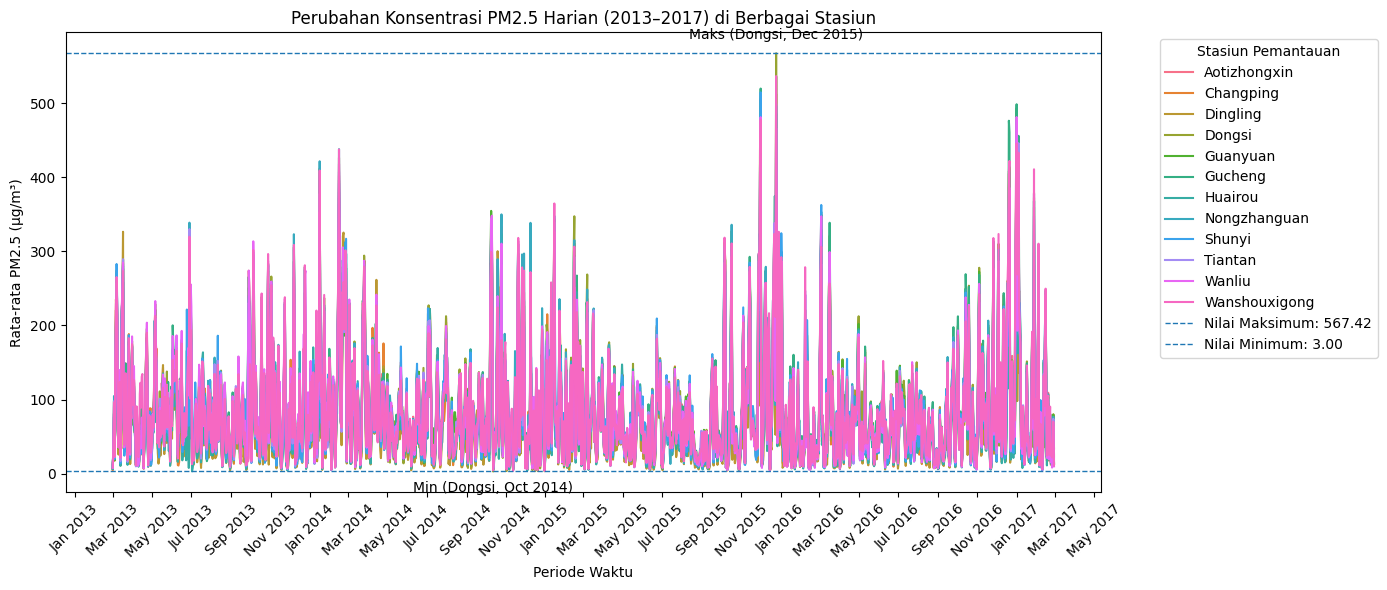

In [25]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=daily_pm25,
    x="datetime",
    y="PM2.5",
    hue="station"
)

plt.title("Perubahan Konsentrasi PM2.5 Harian (2013–2017) di Berbagai Stasiun")
plt.xlabel("Periode Waktu")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")

axis = plt.gca()
axis.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axis.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

pm25_max = daily_pm25["PM2.5"].max()
pm25_min = daily_pm25["PM2.5"].min()

plt.axhline(pm25_max, linestyle="--", linewidth=1, label=f"Nilai Maksimum: {pm25_max:.2f}")
plt.axhline(pm25_min, linestyle="--", linewidth=1, label=f"Nilai Minimum: {pm25_min:.2f}")

row_max = daily_pm25.loc[daily_pm25["PM2.5"].idxmax()]
row_min = daily_pm25.loc[daily_pm25["PM2.5"].idxmin()]

plt.annotate(
    f"Maks ({row_max['station']}, {row_max['datetime'].strftime('%b %Y')})",
    xy=(row_max["datetime"], pm25_max),
    xytext=(0, 10),
    textcoords="offset points",
    ha="center"
)

plt.annotate(
    f"Min ({row_min['station']}, {row_min['datetime'].strftime('%b %Y')})",
    xy=(row_min["datetime"], pm25_min),
    xytext=(0, -15),
    textcoords="offset points",
    ha="center"
)

plt.legend(title="Stasiun Pemantauan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

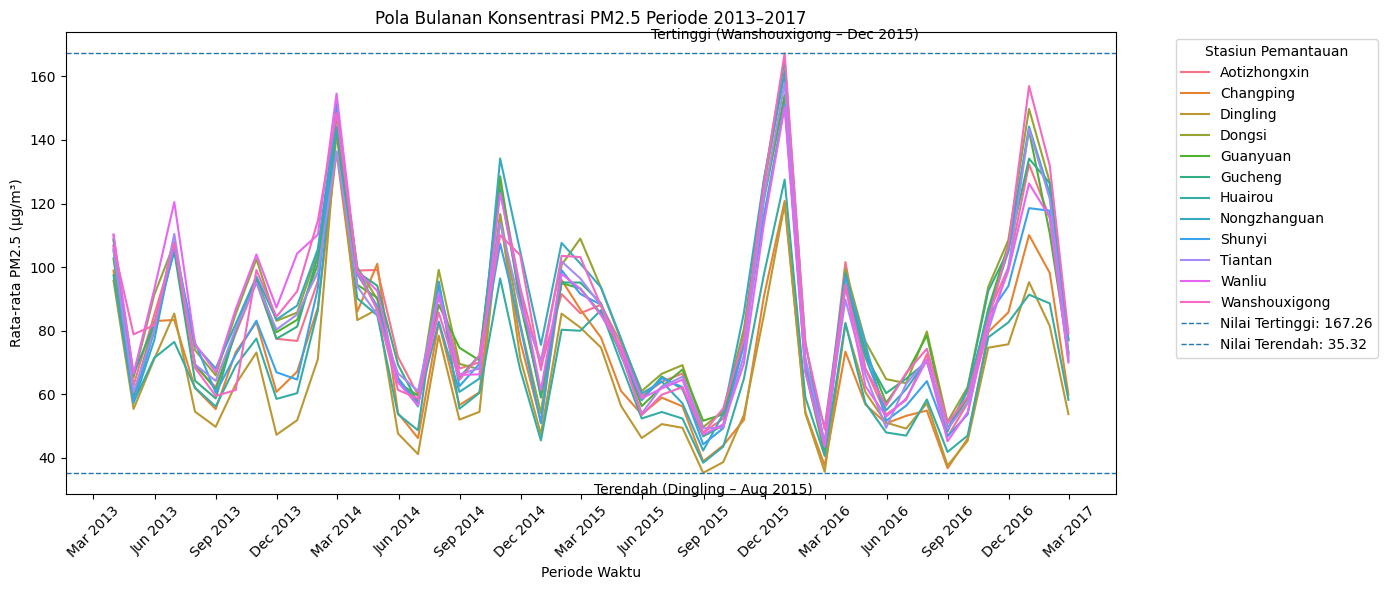

In [27]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=monthly_pm25,
    x="datetime",
    y="PM2.5",
    hue="station"
)

plt.title("Pola Bulanan Konsentrasi PM2.5 Periode 2013–2017")
plt.xlabel("Periode Waktu")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")

axis = plt.gca()
axis.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axis.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

pm25_max = monthly_pm25["PM2.5"].max()
pm25_min = monthly_pm25["PM2.5"].min()

plt.axhline(pm25_max, linestyle="--", linewidth=1, label=f"Nilai Tertinggi: {pm25_max:.2f}")
plt.axhline(pm25_min, linestyle="--", linewidth=1, label=f"Nilai Terendah: {pm25_min:.2f}")

row_max = monthly_pm25.loc[monthly_pm25["PM2.5"].idxmax()]
row_min = monthly_pm25.loc[monthly_pm25["PM2.5"].idxmin()]

plt.annotate(
    f"Tertinggi ({row_max['station']} – {row_max['datetime'].strftime('%b %Y')})",
    xy=(row_max["datetime"], pm25_max),
    xytext=(0, 10),
    textcoords="offset points",
    ha="center"
)

plt.annotate(
    f"Terendah ({row_min['station']} – {row_min['datetime'].strftime('%b %Y')})",
    xy=(row_min["datetime"], pm25_min),
    xytext=(0, -15),
    textcoords="offset points",
    ha="center"
)

plt.legend(title="Stasiun Pemantauan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah terdapat perbedaan pola konsentrasi PM2.5 antara hari kerja dan akhir pekan,̵ serta bagaimana pola harian PM2.5 dari Senin hingga Minggu di setiap stasiun?

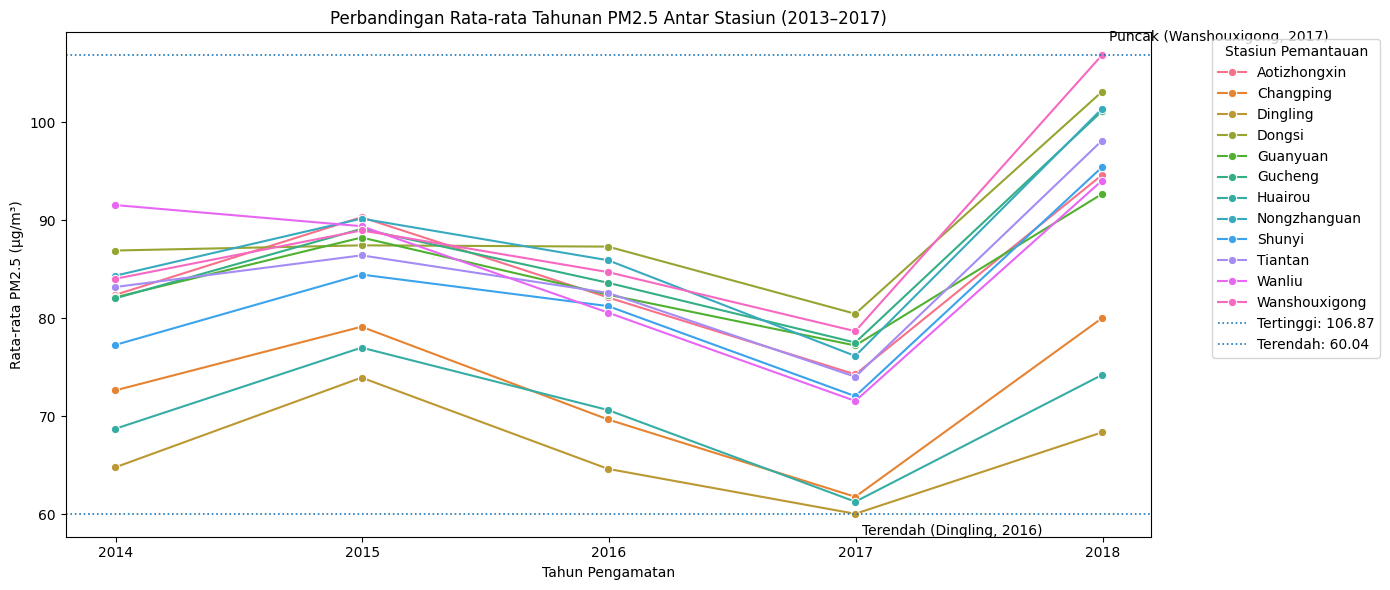

In [28]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=annual_pm25,
    x="datetime",
    y="PM2.5",
    hue="station",
    marker="o"
)

plt.title("Perbandingan Rata-rata Tahunan PM2.5 Antar Stasiun (2013–2017)")
plt.xlabel("Tahun Pengamatan")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")

axis = plt.gca()
axis.xaxis.set_major_locator(mdates.YearLocator())
axis.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xticks(rotation=0)

pm25_high = annual_pm25["PM2.5"].max()
pm25_low = annual_pm25["PM2.5"].min()

plt.axhline(pm25_high, linestyle=":", linewidth=1.2, label=f"Tertinggi: {pm25_high:.2f}")
plt.axhline(pm25_low, linestyle=":", linewidth=1.2, label=f"Terendah: {pm25_low:.2f}")

peak_row = annual_pm25.loc[annual_pm25["PM2.5"].idxmax()]
low_row = annual_pm25.loc[annual_pm25["PM2.5"].idxmin()]

plt.annotate(
    f"Puncak ({peak_row['station']}, {peak_row['datetime'].year})",
    xy=(peak_row["datetime"], pm25_high),
    xytext=(5, 10),
    textcoords="offset points"
)

plt.annotate(
    f"Terendah ({low_row['station']}, {low_row['datetime'].year})",
    xy=(low_row["datetime"], pm25_low),
    xytext=(5, -15),
    textcoords="offset points"
)

plt.legend(title="Stasiun Pemantauan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

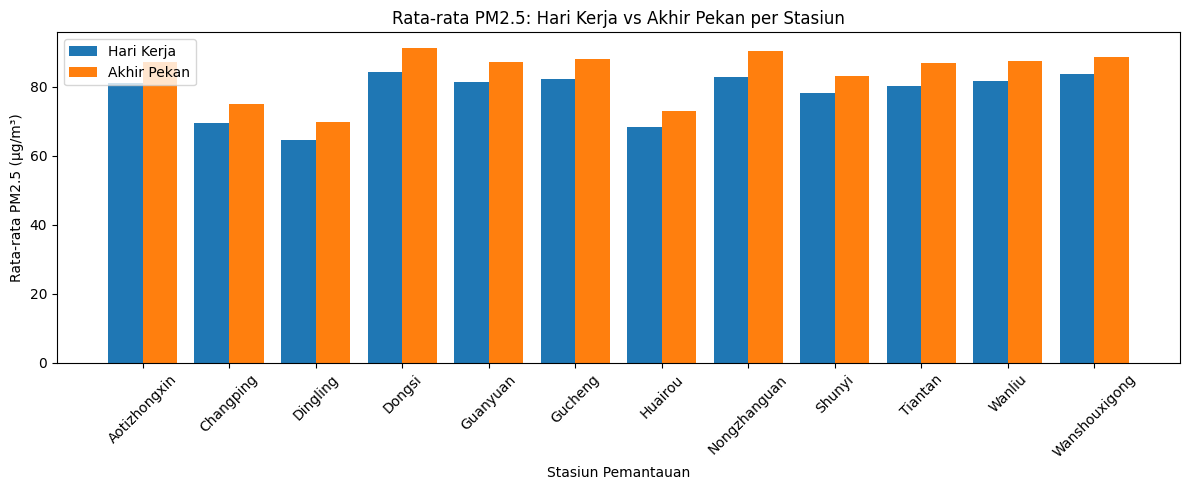

In [29]:
air_quality_df["weekday_num"] = air_quality_df["datetime"].dt.weekday

air_quality_df["day_category"] = np.where(
    air_quality_df["weekday_num"] < 5,
    "Hari Kerja",
    "Akhir Pekan"
)

avg_pm25_daytype = (
    air_quality_df
        .groupby(["station", "day_category"])["PM2.5"]
        .mean()
        .reset_index()
)

pivot_pm25 = avg_pm25_daytype.pivot(
    index="station",
    columns="day_category",
    values="PM2.5"
)

labels = pivot_pm25.index
x_pos = np.arange(len(labels))
bar_width = 0.4

plt.figure(figsize=(12, 5))
plt.bar(x_pos - bar_width/2, pivot_pm25["Hari Kerja"], bar_width, label="Hari Kerja")
plt.bar(x_pos + bar_width/2, pivot_pm25["Akhir Pekan"], bar_width, label="Akhir Pekan")

plt.title("Rata-rata PM2.5: Hari Kerja vs Akhir Pekan per Stasiun")
plt.xlabel("Stasiun Pemantauan")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.xticks(x_pos, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

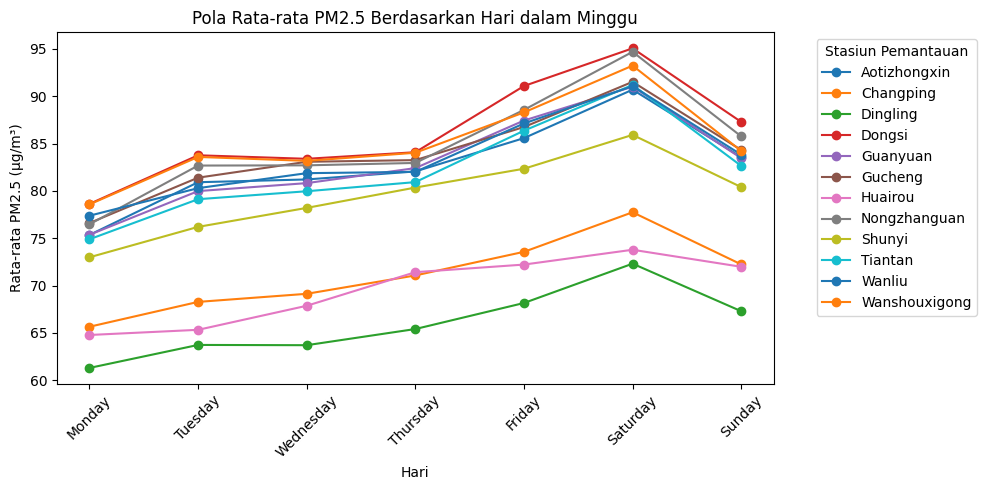

In [30]:
air_quality_df["weekday_name"] = air_quality_df["datetime"].dt.day_name()

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

avg_pm25_weekday = (
    air_quality_df
        .groupby(["station", "weekday_name"])["PM2.5"]
        .mean()
        .reset_index()
)

plt.figure(figsize=(10, 5))

for st in avg_pm25_weekday["station"].unique():
    subset = avg_pm25_weekday[avg_pm25_weekday["station"] == st]
    subset = subset.set_index("weekday_name").reindex(weekday_order)

    plt.plot(
        weekday_order,
        subset["PM2.5"],
        marker="o",
        label=st
    )

plt.title("Pola Rata-rata PM2.5 Berdasarkan Hari dalam Minggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend(title="Stasiun Pemantauan", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Insight:**

Hasil visualisasi menunjukkan bahwa seluruh stasiun pemantauan memiliki pola fluktuasi konsentrasi PM2.5 yang relatif serupa dari waktu ke waktu.
Selain itu, terlihat adanya pola musiman, di mana konsentrasi PM2.5 cenderung lebih tinggi pada musim dingin dan lebih rendah pada musim panas.

Analisis berbasis hari dalam minggu menunjukkan bahwa konsentrasi PM2.5 mengalami peningkatan secara bertahap dari awal hari kerja menuju akhir pekan.
Pada sebagian besar stasiun, nilai rata-rata PM2.5 pada akhir pekan tercatat sedikit lebih tinggi dibandingkan hari kerja, dengan puncak konsentrasi umumnya terjadi pada hari Sabtu.

Stasiun dengan tingkat polusi yang relatif tinggi secara konsisten menunjukkan kenaikan konsentrasi yang lebih tajam menjelang akhir pekan.
Sementara itu, stasiun dengan tingkat PM2.5 yang lebih rendah tetap mengikuti pola yang sama, meskipun berada pada level konsentrasi yang lebih rendah.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion

Analisis konsentrasi PM2.5 selama periode 2013–2017 menunjukkan pola fluktuatif yang dipengaruhi oleh faktor musiman. Konsentrasi PM2.5 cenderung meningkat pada akhir tahun dan menurun pada pertengahan tahun, yang mengindikasikan adanya pengaruh kondisi musiman terhadap kualitas udara. Pola ini terlihat konsisten di seluruh stasiun pemantauan, meskipun tingkat konsentrasinya berbeda-beda.

Perbandingan antar stasiun menunjukkan bahwa meskipun pola pergerakan PM2.5 relatif serupa, terdapat perbedaan tingkat konsentrasi yang cukup jelas. Beberapa stasiun secara konsisten mencatat konsentrasi PM2.5 yang lebih tinggi, sementara stasiun lainnya berada pada level yang lebih rendah. Hal ini mengindikasikan bahwa faktor lokasi dan karakteristik lingkungan sekitar stasiun memiliki peran penting dalam menentukan tingkat pencemaran udara.

Selain itu, analisis berbasis hari dalam minggu menunjukkan kecenderungan peningkatan konsentrasi PM2.5 menjelang akhir pekan, dengan nilai tertinggi umumnya terjadi pada hari Sabtu. Temuan ini mengindikasikan adanya pengaruh aktivitas manusia terhadap peningkatan polusi udara. Secara umum, kualitas udara selama periode pengamatan relatif stabil, namun tetap rentan terhadap kejadian polusi ekstrem yang bersifat temporer dan dipengaruhi oleh faktor musiman, tanpa menunjukkan indikasi perbaikan jangka panjang yang signifikan.
